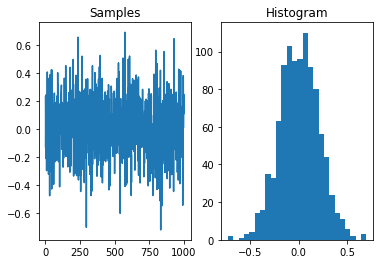

Number of samples 1000
Umbral inferrior: -0.3223427962936294
Umbral inferrior: 0.3294211215240805


In [7]:
# %% importar
import numpy as np
import matplotlib.pyplot as plt
import math

def outlinerRemoval(s, t):
    # s: Dataset con las muestras de la variable aleatoria
    # t: Porcentaje umbral por el cual consideramos que las muetras son
    # anomalías

    # Calculo percentil inferior y superior
    s_min = np.percentile(s, 100 - t)
    s_max = np.percentile(s, t)

    return [s_min, s_max]

# Probabilidad de ocurrencia para considerarse outlier
probabilidad = 95

x = np.random.normal(loc=0, scale=0.2, size=1000)

f, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x)
ax1.set_title('Samples')
ax2.hist(x, bins='fd')
ax2.set_title('Histogram')
plt.show()

limites = outlinerRemoval(x, probabilidad)

print('Number of samples ' + str(len(x)) +
      '\nUmbral inferrior: ' + str(limites[0]) +
      '\nUmbral inferrior: ' + str(limites[1]))
# Al ser una distribución gaussiana, el umbral inferior es el mismo que el
# superior, como se observa en el histpgrama.

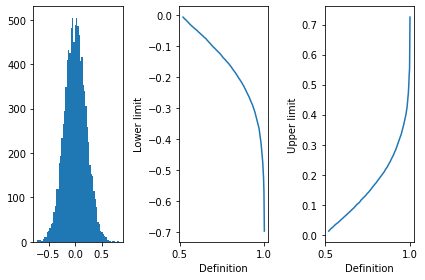

In [17]:
# Dataset original
signal = np.random.normal(loc=0, scale=0.2, size=10000)

# Definicion de anomalia
prob_rule = np.linspace(start=0.52, stop=0.9999, num=200)

# Limite superior e inferior
lower_limit = np.zeros(len(prob_rule))
upper_limit = np.zeros(len(prob_rule))

for i in range(0, len(prob_rule)):
    lims = outlinerRemoval(signal, 100.0 * prob_rule[i])
    lower_limit[i] = lims[0]
    upper_limit[i] = lims[1]

f, (ax0, ax1, ax2) = plt.subplots(1, 3)

ax0.hist(signal, bins='fd')
ax1.plot(prob_rule, lower_limit)
ax1.set_xlabel('Definition')
ax1.set_ylabel('Lower limit')
ax2.plot(prob_rule, upper_limit)
ax2.set_xlabel('Definition')
ax2.set_ylabel('Upper limit')
plt.tight_layout()
plt.show()


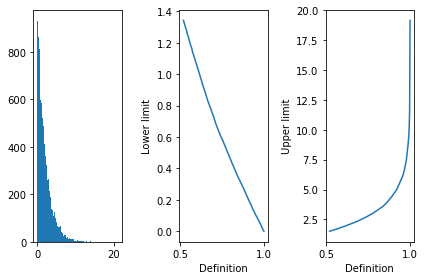

In [21]:
# Dataset original
signal = np.random.chisquare(2, 10000)

# Definicion de anomalia
prob_rule = np.linspace(start=0.52, stop=0.9999, num=200)

# Limite superior e inferior
lower_limit = np.zeros(len(prob_rule))
upper_limit = np.zeros(len(prob_rule))

for i in range(0, len(prob_rule)):
    lims = outlinerRemoval(signal, 100.0 * prob_rule[i])
    lower_limit[i] = lims[0]
    upper_limit[i] = lims[1]

f, (ax0, ax1, ax2) = plt.subplots(1, 3)

ax0.hist(signal, bins='fd')
ax1.plot(prob_rule, lower_limit)
ax1.set_xlabel('Definition')
ax1.set_ylabel('Lower limit')
ax2.plot(prob_rule, upper_limit)
ax2.set_xlabel('Definition')
ax2.set_ylabel('Upper limit')
plt.tight_layout()
plt.show()


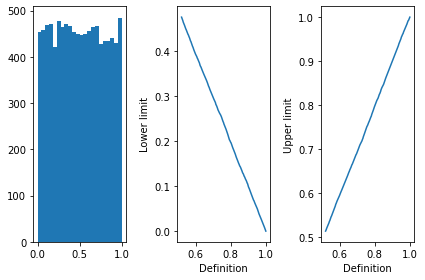

In [19]:
# Dataset original
signal = np.random.uniform(low=0, high=1, size=10000)

# Definicion de anomalia
prob_rule = np.linspace(start=0.52, stop=0.9999, num=200)

# Limite superior e inferior
lower_limit = np.zeros(len(prob_rule))
upper_limit = np.zeros(len(prob_rule))

for i in range(0, len(prob_rule)):
    lims = outlinerRemoval(signal, 100.0 * prob_rule[i])
    lower_limit[i] = lims[0]
    upper_limit[i] = lims[1]

f, (ax0, ax1, ax2) = plt.subplots(1, 3)

ax0.hist(signal, bins='fd')
ax1.plot(prob_rule, lower_limit)
ax1.set_xlabel('Definition')
ax1.set_ylabel('Lower limit')
ax2.plot(prob_rule, upper_limit)
ax2.set_xlabel('Definition')
ax2.set_ylabel('Upper limit')
plt.tight_layout()
plt.show()


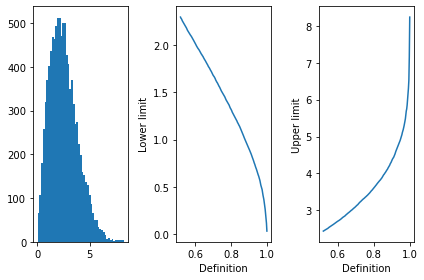

In [20]:
# Dataset original
signal = np.random.rayleigh(scale=2, size=10000)

# Definicion de anomalia
prob_rule = np.linspace(start=0.52, stop=0.9999, num=200)

# Limite superior e inferior
lower_limit = np.zeros(len(prob_rule))
upper_limit = np.zeros(len(prob_rule))

for i in range(0, len(prob_rule)):
    lims = outlinerRemoval(signal, 100.0 * prob_rule[i])
    lower_limit[i] = lims[0]
    upper_limit[i] = lims[1]

f, (ax0, ax1, ax2) = plt.subplots(1, 3)

ax0.hist(signal, bins='fd')
ax1.plot(prob_rule, lower_limit)
ax1.set_xlabel('Definition')
ax1.set_ylabel('Lower limit')
ax2.plot(prob_rule, upper_limit)
ax2.set_xlabel('Definition')
ax2.set_ylabel('Upper limit')
plt.tight_layout()
plt.show()


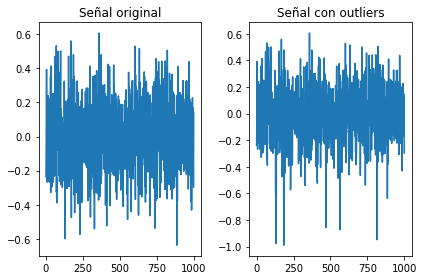

Media y desviación estandard de la señal original: -0.004319101188958299, 0.19855173344613108
Media y desviación estandard de la señal original: -0.008217693333451232, 0.20991675912909072


In [35]:
def addOutlierToSignal(input_signal, percentage=0.5):
    # Se añade outliers al dataset. El numero de outliers viene dado el percentage de muestras.
    num_outliers = int(round((percentage / 100.0) * len(input_signal)))
    idx = np.round(np.random.uniform(0, len(input_signal) - 1, size=num_outliers)).astype(int)

    # Max, min, desviacion estandard del dataset creado
    max = np.max(input_signal)
    min = np.min(input_signal)
    std = np.std(input_signal)

    # Las dos mitades del dataset
    n1 = int( num_outliers / 2)
    n2 = num_outliers - n1

    outliers = np.zeros(num_outliers)
    for i in range(0, num_outliers):
        if(i % 2 == 0):
            outliers[i] = np.random.uniform(min - 2 * std, min - std, size=1)
        else:
            outliers[i] = np.random.uniform(max + std, min + 2 * std, size=1)
            
    noisy_signal = np.zeros(len(input_signal))

    # Combinacion de la entrada con el outlier
    cont = 0
    for i in range(0, len(input_signal)):
        if i in idx:
            noisy_signal[i] = outliers[cont]
            cont += 1
        else:
            noisy_signal[i] = input_signal[i]
    return noisy_signal

x = np.random.normal(loc=0, scale=0.2, size=1000)

p = 1.0
# Calculo con el numero de outliers añadidos. 10
num_added_outliers = int((p / 100.0) * len(x))

noise_x = addOutlierToSignal(x, p)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x)
ax1.set_title('Señal original')
ax2.plot(noise_x)
ax2.set_title('Señal con outliers')
plt.tight_layout()
plt.show()

# La media es parecida, pero la desviación estandard con outliers aumenta.
print('Media y desviación estandard de la señal original: ' + str(np.mean(x)) + ', ' + str(np.std(x)))
print('Media y desviación estandard de la señal original: ' + str(np.mean(noise_x)) + ', ' + str(np.std(noise_x)))

Lower limit: -0.6376031618305027 
Upper limit: 0.505597315597124
Indetificados 10 outliers de 10 añadidos.


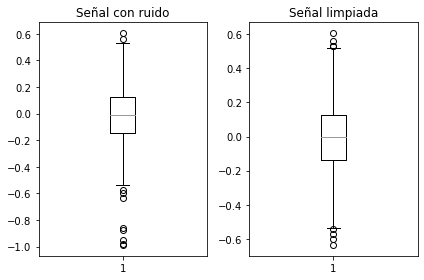

In [64]:
lims = outlinerRemoval(noise_x, 99.5)
print('Lower limit:', lims[0], '\nUpper limit:', lims[1])

num_outliers_indentified = sum(np.greater(noise_x, lims[1])) + sum(np.less_equal(noise_x, lims[0]))
print('Indetificados', num_outliers_indentified, 'outliers de', num_added_outliers, 'añadidos.')

cx = noise_x[(noise_x >= lims[0]) & (noise_x <= lims[1])]

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(noise_x)
ax1.set_title('Señal con ruido')
ax2.boxplot(x)
ax2.set_title('Señal limpiada')
plt.tight_layout()
plt.show()